# ICS 434: DATA SCIENCE FUNDAMENTALS

## Introduction to Parameter Estimation
## Poisson Distribution
---

## Announcements

* Weekly engagement #5
  * Complete the assignment for __Week 7__ under "Weekly Engagement" in Laulima
  * Due on Sunday, __February 26, 11:55 PM__
  * Submit the Jupyter notebook file (.ipynb) showing your answers and outputs

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

%matplotlib inline

### Statistical Modeling and Generative Modeling
 

* Generative models are expressive representations of the data generating process
  * A generative model describes how likely a given example is to be generated

  * Having access to a distribution's parameters is very useful to answer the different types of questions we have been interested in so far:

    1. Probability, and expectation and variance of distributions
    2. Hypothesis testing

* Most often we don't have access to parameters that generated the data
  
* Therefore, we need to estimate those parameters from a small sample


### Generative Modeling
 

* Generative models are expressive representations of the data generating process
  * A generative model describes how likely a given example is to be generated

  * Having access to a distribution's parameters is very useful to answer the different types of questions we have been interested in so far:

    1. Probability, and expectation and variance of distributions
    2. Hypothesis testing

* Most often we don't have access to parameters that generated the data
  
* Therefore, we need to estimate those parameters from a small sample


### Statistical Inference 

* Contrary to generative models, to estimate a distribution's parameters we work from the data upwards

* This upward–reasoning step is called _statistical inference_

  <img src="images/proba_stats_2.png" alt="drawing" width="500px"/>

### Statistical Inference -- Cont'd

* Working with a small sample from a large population

* You are using the sample (a measure on the sample) as a proxy for some parameter in the population

  * What is a population, and why do we need to measure a sample from the population?
    * It is a proxy for the "ground truth"
    * Allows us to sample data from the underlying probability distribution as if we're sampling from the actual population
    * Allows us to compute probabilities of events, expectation, etc. 


### Parameter Estimation

*  Given a dataset, we are most often interested in estimating the parameter(s) of the distribution that generated it

* Ex. We randomly count the number of observed moving traffic citations within a 5 miles radius of UH Manoa during 90 days, spread across 12 months
  * We want to even out sampling to avoid any bias

* The number of citations should follow some probability distribution specific to count data
  * This is a Poisson distribution

* What is the parameter of that distribution?

    * We will answer this question using three different approaches:
      1. Bootstrap Confidence Intervals
      2. Maximum Likelihood 
      3. Bayesian Framework
 

In [2]:
citations_data = pd.read_csv("data/citations_counts.tsv", index_col="Day")
citations_data.head()

,Counts
Day,
0,27
1,18
2,30
3,13
4,20


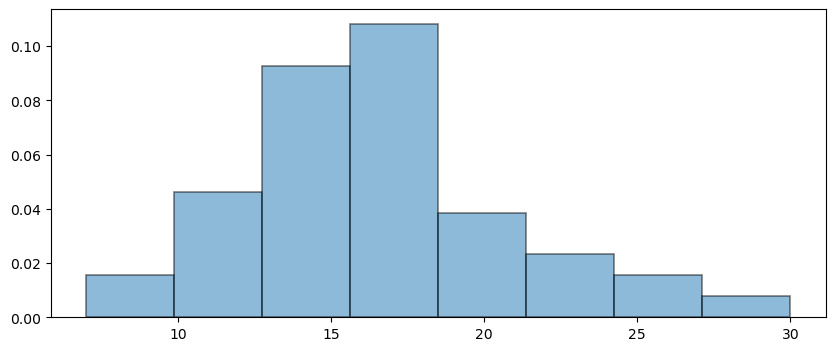

In [3]:
plt.figure(figsize=(10, 4))

_ = plt.hist(citations_data["Counts"], bins=8, density=True, edgecolor='black', linewidth=1.2, alpha=0.5)

### The Poisson Distribution

* Used in experiments that model the numbers of events occuring in a fixed period of time or a fixed area of space
* Ex.: 
    - Number of daily accidents on the H1
    - Number of people who enter a grocery store every hour
    - Number of childbirths in Hawaii every day
    - Number of chocolate chips in a cookie
    - etc.


### Properties of the Poisson Distribution

* Poisson distribution has only one parameter that determines its shape and location
  * The parameter is referrd to as $\lambda$

* A random variable $X$ has a Poisson distribution, written $X \sim Poisson(\lambda)$, if:

  * $X$ is the number of events occurence in a given time period or space area
    * Countably infinite non-negative values [0, 1, ... ]
    
  * The events are independent (the occurrence of events does not increase the likelihood of other events occurring)

  * The mean and the variance of a Poisson distribution are represented using the same parameter $\lambda$
  
* The $pmf$ of a Poisson distribution is:

$$
P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

### Example

- Assume that the clientele visiting a store per hour follows a Poisson distribution with $\lambda = 10$. Then the probability distribution of the random variable $X$ representing the number of clients in the store is:

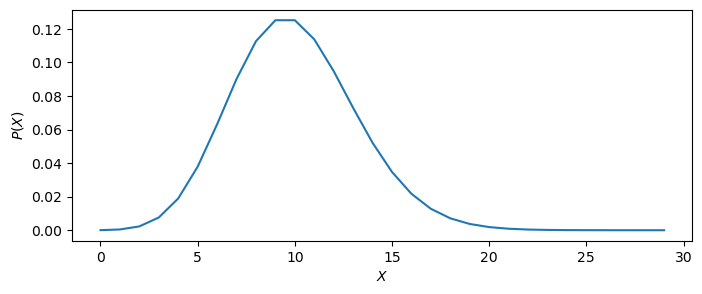

In [4]:
from scipy.stats import poisson

x = np.arange(0, 30, 1)
pmfs_x = poisson.pmf(x, 10)

plt.figure(figsize=(8, 3))
plt.plot(x, pmfs_x)
plt.xlabel("$X$")
_ = plt.ylabel("$P(X)$")

### Example -- Cont'd

- If the clientele visiting a store per hour follows a Poisson distribution with $\lambda = 10$. 

- The probability that $x$, for $x \in  \{0, 5, 10, 15, 20, 30, 50\}$, clients visit the store tomorrow between 3 PM and 4 PM is:

```python
for x in [0, 5, 10, 15, 20, 30, 50]:
    print( "The pmf of x = %d is %1.20f " % (x, poisson.pmf(x, 10)))
```

### Example -- Cont'd

- The probability that $x$, for $x \in  \{0, 5, 10, 15, 20, 30, 50\}$, clients visit the store tomorrow between 3 PM and 4 PM is:

In [5]:
for x in [0, 5, 10, 15, 20, 30, 50]:
    print( "The pmf of x = %2d is %1.20f" % (x, poisson.pmf(x, 10)))

The pmf of x =  0 is 0.00004539992976248485
The pmf of x =  5 is 0.03783327480207079180
The pmf of x = 10 is 0.12511003572113371662
The pmf of x = 15 is 0.03471806963068424512
The pmf of x = 20 is 0.00186608131399877415
The pmf of x = 30 is 0.00000017115717355368
The pmf of x = 50 is 0.00000000000000000015


### Link Between the Mean and the Variance

- As mentioned, the mean and variance are both modeled with the same parameter $\lambda$
  - What is the significance of this statement?

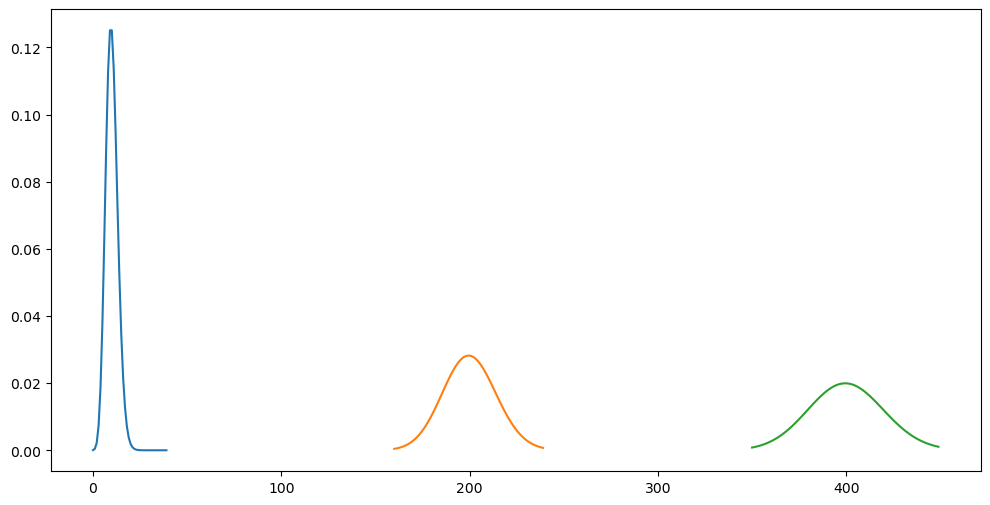

In [6]:
plt.figure(figsize=(12, 6))

x = np.arange(0, 40, 1)
pmfs_x = poisson.pmf(x, 10)
plt.plot(x, pmfs_x)

x = np.arange(160, 240, 1)
pmfs_x = poisson.pmf(x, 200)
plt.plot(x, pmfs_x)

x = np.arange(350, 450, 1)
pmfs_x = poisson.pmf(x, 400)
_ = plt.plot(x, pmfs_x)

### Notes About the Poisson Distribution
* For values of $\lambda > 20$, the Poisson distribution can be approximated as Gaussian with $\mu=\lambda$ and $\sigma = \sqrt{\lambda}$
  * This can be shown mathematically and this simplification sometimes makes the math easy 
  
* Not all count data is Poisson
  * Data where the mean is not equal to the variance is not Poisson
  * Occurs in overdispersed data when external factors, such as noise, contribute to the observed variance
    * Negative Binomial is often used with such data
      * More on this distribution later

### Notes About the Poisson Distribution
* For values of $\lambda > 20$, the Poisson distribution can be approximated as Gaussian with $\mu=\lambda$ and $\sigma = \sqrt{\lambda}$
  * This can be shown mathematically and this simplification sometimes makes the math easy 
  
* Not all count data is Poisson
  * Data where the mean is not equal to the variance is not Poisson
  * Occurs in overdispersed data when external factors, such as noise, contribute to the observed variance